Projeto Pizza
Objetivo
Examinar como vendas variam de acordo com períodos(manhã, tarde e noite), preferência de tamanhos (grande, médio e pequeno),  sabores mais vendidos e variedade de preços.

In [106]:
# Importando bibliotecas para modelagem de dados
import pandas as pd
import numpy as np

In [107]:
# Carregando a base de dados
df=pd.read_csv('C:\\Users\\Usuário\\Downloads\\portifolio3\\archive (9)\\A_year_of_pizza_sales_from_a_pizza_place_872_68.csv', sep=',', encoding='latin-1')
df.head(3)

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00


In [108]:
# Renomeando colunas
df.columns=['Sem nome: 0', 'X','ID','Data','Hora','Nome','Tamanho','Tipo','Preço']
df.columns

Index(['Sem nome: 0', 'X', 'ID', 'Data', 'Hora', 'Nome', 'Tamanho', 'Tipo',
       'Preço'],
      dtype='object')

In [109]:
# Total de linhas e colunas
df.shape

(49574, 9)

In [110]:
# Verificando duplicatas
df.drop_duplicates().count()

Sem nome: 0    49574
X              49574
ID             49574
Data           49574
Hora           49574
Nome           49574
Tamanho        49574
Tipo           49574
Preço          49574
dtype: int64

In [111]:
# Verificando dados faltantes
df.isnull().sum()

Sem nome: 0    0
X              0
ID             0
Data           0
Hora           0
Nome           0
Tamanho        0
Tipo           0
Preço          0
dtype: int64

Organizando e limpando base de dados

In [112]:
# Valores únicos coluna "Nome"
df['Nome'].unique()

array(['hawaiian', 'classic_dlx', 'mexicana', 'thai_ckn', 'five_cheese',
       'ital_supr', 'prsc_argla', 'bbq_ckn', 'the_greek', 'spinach_supr',
       'spin_pesto', 'spicy_ital', 'ital_cpcllo', 'veggie_veg',
       'green_garden', 'southw_ckn', 'pepperoni', 'cali_ckn', 'ckn_pesto',
       'big_meat', 'soppressata', 'four_cheese', 'napolitana',
       'mediterraneo', 'spinach_fet', 'ital_veggie', 'calabrese',
       'peppr_salami', 'sicilian', 'ckn_alfredo', 'pep_msh_pep',
       'brie_carre'], dtype=object)

In [113]:
# Lista de nomes para remover
remover = ['thai_ckn','prsc_argla','spin_pesto','southw_ckn','cali_ckn','ckn_pesto','soppressata','spinach_fet']

# Filtrando para manter os nomes que não estão na lista 'remover'
df = df[~df['Nome'].isin(remover)]

In [114]:
# Definir novos nomes para coluna 'Nome' 
mapeamento = {
    'hawaiian': 'havaiana',
    'classic_dlx': 'clássica',
    'mexicana': 'mexicana',
    'five_cheese': '5 queijo',
    'ital_supr':'italiana especial',
    'bbq_ckn' :'churrasco',
    'the_greek' : 'grego',
    'spinach_supr': 'espinafre',
    'spicy_ital': 'italiano picante',
    'ital_cpcllo' : 'italiano chipotle',
    'veggie_veg': 'vegetariano',
    'green_garden':'jardim verde',
    'pepperoni':'pepperoni',
    'big_meat' :'carne',
    'four_cheese':'4 queijo',
    'napolitana': 'napolitana',
    'mediterraneo': 'mediterraneo',
    'ital_veggie':'italiana vegetariana',
    'calabrese':'calabresa',
    'peppr_salami':'salame',
    'sicilian':'siciliano',
    'ckn_alfredo':'alfredo',
    'pep_msh_pep':'pep mais pep',
    'brie_carre':'brie carré'
    
}

# Aplicando mapeamento
df['Nome'] = df['Nome'].replace(mapeamento)
df.iloc[:2][['Nome']]

,Nome
0,havaiana
1,clássica


In [115]:
# Definindo novos nomes para coluna 'Tipo'
mapeamento = {
    'classic': 'clássico',
    'veggie':'vegetariano',
    'chicken':'frango',
    'supreme': 'supremo'
}

# Aplicando mapeamento 
df['Tipo'] = df['Tipo'].replace(mapeamento)
df.iloc[:2][['Tipo']]

,Tipo
0,clássico
1,clássico


In [116]:
# Definindo novo nome para coluna 'Tamanho'
mapeamento = {
    'M': 'Médio',
    'L':'Grande',
    'S':'Pequeno',
    'XL': 'GG',
    'XXL':'GGG'
}

# Aplicando mapeamento 
df['Tamanho'] = df['Tamanho'].replace(mapeamento)
df.iloc[:2][['Tamanho']]

,Tamanho
0,Médio
1,Médio


In [117]:
# Convertendo a coluna 'Data' 
df['Data'] = pd.to_datetime(df['Data'])

# Formatando
df['Data'] = df['Data'].dt.strftime('%d-%m-%Y')
df['Data'].head(2)

0    01-01-2015
1    01-01-2015
Name: Data, dtype: object

Começando as análises

In [118]:
# Quantidade de sabores
print(f'Quantidade de sabores: {df['Nome'].nunique()}')

Quantidade de sabores: 24


In [119]:
# Obtendo os valores únicos (sem duplicatas)
nomes_unicos = pd.Series(df['Nome'].unique()).drop_duplicates()

# Organizando para quebrar a linha a cada 5 nomes
nomes_formatados = ' |\n'.join(' | '.join(nomes_unicos[i:i+10]) for i in range(0, len(nomes_unicos), 10))

# Exibindo o resultado
print(f"Sabores:\n{nomes_formatados}")

Sabores:
havaiana | clássica | mexicana | 5 queijo | italiana especial | churrasco | grego | espinafre | italiano picante | italiano chipotle |
vegetariano | jardim verde | pepperoni | carne | 4 queijo | napolitana | mediterraneo | italiana vegetariana | calabresa | salame |
siciliano | alfredo | pep mais pep | brie carré


In [120]:
# Contagem de cada sabor
contagem_sabores = df['Nome'].value_counts()

# Exibindo o resultado
print(contagem_sabores)

Nome
clássica                2453
churrasco               2432
havaiana                2422
pepperoni               2418
siciliano               1938
italiano picante        1924
carne                   1914
4 queijo                1902
italiana especial       1884
vegetariano             1526
mexicana                1484
napolitana              1464
salame                  1446
italiano chipotle       1438
grego                   1420
5 queijo                1409
pep mais pep            1359
jardim verde             997
alfredo                  987
italiana vegetariana     981
espinafre                950
calabresa                937
mediterraneo             934
brie carré               490
Name: count, dtype: int64


In [121]:
# Encontrando o sabor mais vendido e a quantidade
sabor_mais_vendido = contagem_sabores.idxmax()
quantidade_vendida = contagem_sabores.max()

# Exibindo o resultado
print(f'O sabor mais vendido é: {sabor_mais_vendido} com {quantidade_vendida} vendas.')

O sabor mais vendido é: clássica com 2453 vendas.


In [122]:
# Encontrando o sabor menos vendido e a quantidade
sabor_mais_vendido = contagem_sabores.idxmin()
quantidade_vendida = contagem_sabores.min()

print(f'O sabor menos vendido é: {sabor_mais_vendido} com {quantidade_vendida} vendas.')

O sabor menos vendido é: brie carré com 490 vendas.


In [123]:
# Agrupando por Data
vendas_por_mes = df.groupby('Data').size()

# Encontrando o maior número de vendas
mes_mais_vendas = vendas_por_mes.idxmax()
quantidade_vendida = vendas_por_mes.max()

# Exibindo o resultado
print(f"O mês com mais vendas é {mes_mais_vendas} com {quantidade_vendida} vendas.")

O mês com mais vendas é 26-11-2015 com 199 vendas.


In [124]:
# Agrupando por Data
vendas_por_mes = df.groupby('Data').size()

# Encontrando o menor número de vendas
mes_mais_vendas = vendas_por_mes.idxmin()
quantidade_vendida = vendas_por_mes.min()

# Exibindo o resultado
print(f"O mês com menor vendas é {mes_mais_vendas} com {quantidade_vendida} vendas.")

O mês com menor vendas é 29-12-2015 com 56 vendas.


In [125]:
# Importando biblioteca (contagem de ocorrência)
from collections import Counter
contagem = Counter(df['Data'])

# Selecionar as 5 datas mais frequentes
top_5_datas = contagem.most_common(5)

print(f'As 5 datas mais frequentes de vendas:')
for data, frequencia in top_5_datas:
    print(f'{data}: {frequencia} vezes')

As 5 datas mais frequentes de vendas:
26-11-2015: 199 vezes
15-10-2015: 197 vezes
27-11-2015: 196 vezes
04-07-2015: 183 vezes
15-05-2015: 162 vezes


In [126]:
# Selecionar as 5 datas menos frequentes
top_5_datas_menos_frequentes = contagem.most_common()[:-6:-1]

# Convertendo para um formato legível
datas_menos_frequentes = {data: count for data, count in top_5_datas_menos_frequentes}

# Exibindo o resultado
print("As 5 datas menos frequentes são:")
for data, count in datas_menos_frequentes.items():
    print(f"{data}: {count}")

As 5 datas menos frequentes são:
29-12-2015: 56
30-12-2015: 59
22-03-2015: 62
22-11-2015: 63
22-02-2015: 69


In [127]:
# Agrupando por 'Data' e 'Nome'
grouped = df.groupby('Data')['Nome'].value_counts()

# Transformando para facilitar visualização
grouped_df = grouped.reset_index(name='Quantidade')

# Encontrando o nome mais vendido e sua quantidade
most_sold = grouped_df.loc[grouped_df.groupby('Data')['Quantidade'].idxmax()]

# Ordenando
most_sold=most_sold.sort_values(by='Quantidade',ascending=False)

# Exibindo o resultado
print("\nOs 5 dias com maior venda e qual sabor:")
most_sold.head()


Os 5 dias com maior venda e qual sabor:


,Data,Nome,Quantidade
7000,26-11-2015,havaiana,22
7282,27-11-2015,clássica,20
3930,15-05-2015,pepperoni,18
3005,11-12-2015,churrasco,16
4046,15-10-2015,havaiana,16


In [128]:
df['Hora'].unique() # Valores únicos para 'Hora'

array(['11:38:36', '11:57:40', '12:12:28', ..., '20:51:07', '21:14:37',
       '22:09:54'], dtype=object)

In [129]:
# Horario inicial e final
print(f'Início: {df['Hora'].min()}')
print(f'Até: {df['Hora'].max()}')

Início: 09:52:21
Até: 23:05:52


In [130]:
# Horário por período onde mais vende
# Convertendo  para o tipo datetime
df['Hora'] = pd.to_datetime(df['Hora'])

# Extraindo a coluna 'Hora'
df['Hora'] = df['Hora'].dt.hour

#Filtrando por período
manha = df[(df['Hora'] >=9) & (df['Hora'] <= 12)].value_counts().shape[0]
print(f'periodo da manhã: {manha} pedidos')

tarde = df[(df['Hora'] >= 13) & (df['Hora'] < 18)].value_counts().shape[0]
print(f'periodo da tarde: {tarde} pedidos')

noite = df[(df['Hora'] > 18)].value_counts().shape[0]
print(f'periodo da noite: {noite} pedidos')

C:\Users\Usuário\AppData\Local\Temp\ipykernel_8796\3348264827.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hora'] = pd.to_datetime(df['Hora'])


periodo da manhã: 7163 pedidos
periodo da tarde: 16978 pedidos
periodo da noite: 8912 pedidos


In [131]:
# Definindo os intervalos de tempo para cada período 
intervalos = [
    (9, 12, 'Manhã'),
    (13, 17, 'Tarde'),
    (18, 23, 'Noite')
]

# Criando uma função 
def categorizar_periodo(hora):
    for inicio, fim, periodo in intervalos:
        if inicio <= hora <= fim:
            return periodo
    return 'Outro'

# Criando uma nova coluna 'Periodo'
df['Periodo'] = df['Hora'].apply(categorizar_periodo)

# Agrupando 'Periodo' com 'Preço'
vendas_por_periodo = df.groupby('Periodo')['Preço'].sum()

# Período com mais vendas
periodo_mais_vendas = vendas_por_periodo.idxmax()
total_vendas_no_periodo = vendas_por_periodo.max()

print(f'O período com mais vendas é o da {periodo_mais_vendas}, com um total de vendas de R${total_vendas_no_periodo:.2f}')


O período com mais vendas é o da Tarde, com um total de vendas de R$275496.25


In [132]:
# Agrupando por 'Hora' e 'Preço'
vendas_por_hora = df.groupby('Hora')['Preço'].sum()

# Horário com mais vendas
hora_mais_vendas = vendas_por_hora.idxmax()
total_vendas_na_hora = vendas_por_hora.max()

# Horário com menos vendas
hora_menos_vendas = vendas_por_hora.idxmin()
total_vendas_na_hora_menos = vendas_por_hora.min()

print(f'O horário com mais vendas é às {hora_mais_vendas} horas, com um total de vendas de R${total_vendas_na_hora:.2f}')
print(f'O horário com menos vendas é às {hora_menos_vendas} horas, com um total de vendas de R${total_vendas_na_hora_menos:.2f}')


O horário com mais vendas é às 12 horas, com um total de vendas de R$82859.40
O horário com menos vendas é às 9 horas, com um total de vendas de R$83.00


In [ ]:
# Convertendo 'Data' para tipo datetime
df['Data'] = pd.to_datetime(df['Data'], format='%d-%m-%Y', errors='coerce')
df['Data'] = df['Data'].dt.strftime('%d-%m-%Y')

# Convertendo a hora para o formato 'HH:MM:SS'
df['Hora'] = df['Hora'].astype(str).str.zfill(2) + ':00:00'

# Agrupando por 'Data', 'Hora' e 'Nome' e contando as ocorrências
vendas_por_data_hora_nome = df.groupby(['Data', 'Hora', 'Nome']).size().reset_index(name='Quantidade')


# Encontrando a combinação de Data, Hora e Nome mais frequente
if not vendas_por_data_hora_nome.empty:
    mais_frequente = vendas_por_data_hora_nome.loc[vendas_por_data_hora_nome['Quantidade'].idxmax()]
    print("\nData, Hora e Nome com mais frequência:")
    print(mais_frequente)
else:
    print("Nenhuma venda encontrada.")



Data, Hora e Nome com mais frequência:
Data          14-04-2015
Hora            12:00:00
Nome           pepperoni
Quantidade             8
Name: 12783, dtype: object


In [134]:
# Menor e Maior preço
menor_preco=df['Preço'].min()
print(f'Menor preço {menor_preco}')

maior_preco=df['Preço'].max()
print(f'Maior preço {maior_preco}')

Menor preço 9.75
Maior preço 35.95


In [135]:
# Média de preço
media=df['Preço'].mean()
media=round(media,2)
print(f'Média de preço {media}')

Média de preço 16.23


In [136]:
print(f'Quantidade de Tipo: {df['Tipo'].nunique()}')

Quantidade de Tipo: 4


In [137]:
print(f'Quantidade de Tamanho: {df['Tamanho'].nunique()}')

Quantidade de Tamanho: 5


In [138]:
# Contagem de cada sabor
contagem_sabores = df['Tamanho'].value_counts()
print(f'Quantidade de cada tamanho:\n{contagem_sabores}')

Quantidade de cada tamanho:
Tamanho
Grande     13635
Médio      11690
Pequeno    11204
GG           552
GGG           28
Name: count, dtype: int64


In [139]:
# Criei um dicionário com os tamanhos
valores1={"medio": 11690,"grande": 13635, "pequeno": 11204,"gg": 552,"ggg": 28 }

In [140]:
# Maior tamanho 
maior_tamanho = max(valores1.values())
nome_maior_tamanho = next(nome for nome, valor in valores1.items() if valor == maior_tamanho)

print(f'Tamanho mais vendido: {maior_tamanho} ({nome_maior_tamanho})')

Tamanho mais vendido: 13635 (grande)


In [141]:
# Agrupando por 'Tamnho','Tipo' e 'Preço'
grouped_df = df.groupby(['Tamanho', 'Tipo'])['Preço'].mean().reset_index()
value_counts_df = df.groupby(['Tamanho', 'Tipo']).size().reset_index(name='Count')

print(f'{"Média dos preços:":^40}')

# Ordem crescente
grouped_df=grouped_df.sort_values(by='Tamanho', ascending=True)

print(grouped_df)

print("\nContagem dos valores de cada tipo:")

# Ordenando 
value_counts_df = value_counts_df.sort_values(by='Count', ascending=False)
print(value_counts_df)


           Média dos preços:            
    Tamanho         Tipo      Preço
0        GG     clássico  25.500000
1       GGG     clássico  35.950000
2    Grande     clássico  18.367883
3    Grande       frango  20.750000
4    Grande      supremo  20.630639
5    Grande  vegetariano  19.105359
6     Médio     clássico  14.732916
7     Médio       frango  16.750000
8     Médio      supremo  16.410692
9     Médio  vegetariano  15.865644
10  Pequeno     clássico  11.381373
11  Pequeno       frango  12.750000
12  Pequeno      supremo  14.470356
13  Pequeno  vegetariano  12.125687

Contagem dos valores de cada tipo:
    Tamanho         Tipo  Count
10  Pequeno     clássico   6139
5    Grande  vegetariano   4674
6     Médio     clássico   4112
2    Grande     clássico   4057
4    Grande      supremo   3724
8     Médio      supremo   3180
9     Médio  vegetariano   2739
12  Pequeno      supremo   2665
13  Pequeno  vegetariano   1820
7     Médio       frango   1659
3    Grande       frango   1180

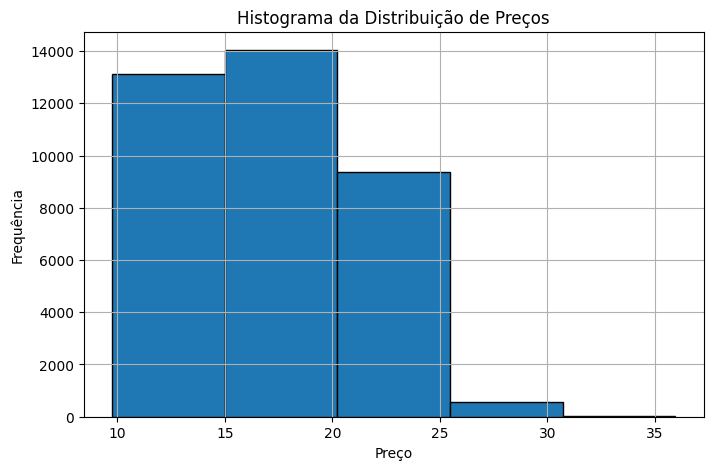

In [142]:
# Importando  biblioteca para criar um histograma
import matplotlib.pyplot as plt

# Plotando um histograma dos preços
plt.figure(figsize=(8, 5))
plt.hist(df['Preço'], bins=5, edgecolor='black')  
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Histograma da Distribuição de Preços')
plt.grid(True)
plt.show()

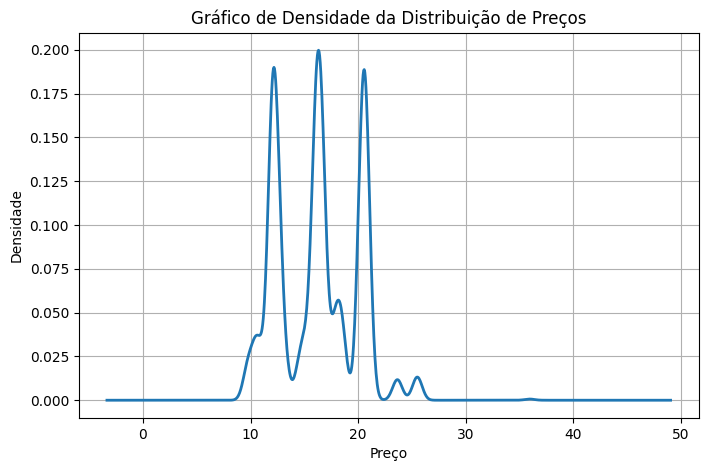

In [143]:
# Plotagem gráfico de densidade dos preços
plt.figure(figsize=(8, 5))
df['Preço'].plot(kind='density', linewidth=2)
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade da Distribuição de Preços')
plt.grid(True)
plt.show()

In [144]:
# Criei um DataFrame
novos_valores = {'Pizza':['Brie Carré','Pep Mais Pep','Alfredo','Siciliano','Salame','Calabresa','Italiano Vegetariano','Mediterraneo','Napolitana',' 4 Queijo','Carne','Pepperoni','Jardim Verde','Vegetariana','Italiana Chipotle','Italiana Picante','Espinafre','Grego','Churrasco','Italiana Eespecial',' 5 Quiejo','Mexicana','Clássica','Havaiana'],

'Total_de_pizza':[490,1359,987,1938,1446,937,981,934,1464,1902,1914,2418,997,1526,1438,1924,950,1420,2432,1884,1409,1484,2453,2422]}

df1=pd.DataFrame(novos_valores)

In [145]:
# Concatenar os DataFrames 
df_concatenado = pd.concat([df, df1], axis=1)
df_concatenado.head(3)

,Sem nome: 0,X,ID,Data,Hora,Nome,Tamanho,Tipo,Preço,Periodo,Pizza,Total_de_pizza
0,1.0,1.0,2015-000001,01-01-2015,11:00:00,havaiana,Médio,clássico,13.25,Manhã,Brie Carré,490.0
1,2.0,2.0,2015-000002,01-01-2015,11:00:00,clássica,Médio,clássico,16.00,Manhã,Pep Mais Pep,1359.0
2,3.0,3.0,2015-000002,01-01-2015,11:00:00,mexicana,Médio,vegetariano,16.00,Manhã,Alfredo,987.0


In [146]:
# Substituindo NaN apenas nas colunas 'Nome' e 'Idade'
df_concatenado = df_concatenado.fillna({'Pizza': 'Desconhecido', 'Total_de_pizza': 0})

df_concatenado.head(3)

,Sem nome: 0,X,ID,Data,Hora,Nome,Tamanho,Tipo,Preço,Periodo,Pizza,Total_de_pizza
0,1.0,1.0,2015-000001,01-01-2015,11:00:00,havaiana,Médio,clássico,13.25,Manhã,Brie Carré,490.0
1,2.0,2.0,2015-000002,01-01-2015,11:00:00,clássica,Médio,clássico,16.00,Manhã,Pep Mais Pep,1359.0
2,3.0,3.0,2015-000002,01-01-2015,11:00:00,mexicana,Médio,vegetariano,16.00,Manhã,Alfredo,987.0


In [147]:
# Converter tipo numérico
df_concatenado['Total_de_pizza'] = pd.to_numeric(df_concatenado['Total_de_pizza'], errors='coerce')

# Calculoe e a correlação entre 'Preço' e 'Volume de vendas'
correlacao = df_concatenado['Preço'].corr(df_concatenado['Total_de_pizza'])

print(f"Correlação entre Preço e Volume de Vendas: {correlacao}")

Correlação entre Preço e Volume de Vendas: -0.004401537930900872


In [148]:
# Agrupando pelo 'ID'
frequencia_compras = df.groupby('ID').size().reset_index(name='Frequência')

# Filtro da 'Frequência com 'ID'
clientes_regulares = frequencia_compras[frequencia_compras['Frequência'] > 2]['ID'].tolist()

print("Clientes regulares:")
clientes_regulares[:10]

Clientes regulares:


['2015-000002',
 '2015-000009',
 '2015-000015',
 '2015-000017',
 '2015-000024',
 '2015-000032',
 '2015-000035',
 '2015-000042',
 '2015-000043',
 '2015-000052']

In [149]:
# Quantidade de clientes
print(f'Quantidade de clientes: {df['ID'].nunique()}')

Quantidade de clientes: 18910


In [150]:
# Quantidade de clientes regulares
quantidade_clientes_regulares = len(clientes_regulares)

print("Quantidade de clientes regulares:", quantidade_clientes_regulares)

Quantidade de clientes regulares: 4380


In [151]:
# Clientes regulares (gastaram $100 de pizza)
clientes_regulares = df_concatenado[df_concatenado['Total_de_pizza'] >= 100]['ID'].drop_duplicates()

# Removendo valores nulos
clientes_regulares_valor = clientes_regulares[clientes_regulares.notnull()]

# Exibindo o resultado
print("Clientes regulares pelo valor total gasto:")
print(clientes_regulares_valor.head(15))  # Usando head() para mostrar os primeiros 15


Clientes regulares pelo valor total gasto:
0     2015-000001
1     2015-000002
7     2015-000003
8     2015-000004
9     2015-000005
10    2015-000006
12    2015-000007
13    2015-000008
14    2015-000009
23    2015-000010
Name: ID, dtype: object


In [152]:
# Agrupando por 'ID' e 'Preço'
valor_medio = df_concatenado.groupby('ID')['Preço'].mean().reset_index(name='Valor Médio')

# Ordenar
valor_medio = valor_medio.sort_values(by='Valor Médio', ascending=False)

# Exibindo o resultado
print("Padrões de Valor Médio por ID:")
print(valor_medio[:10])

Padrões de Valor Médio por ID:
                ID  Valor Médio
2334   2015-002614        35.95
18470  2015-020866        35.95
5348   2015-006038        35.95
3994   2015-004498        35.95
16637  2015-018789        35.95
16057  2015-018139        35.95
1404   2015-001581        35.95
3818   2015-004307        35.95
14267  2015-016119        35.95
1359   2015-001528        35.95


In [153]:
# Convertendo 'Data' para o tipo datetime 
df['Data'] = pd.to_datetime(df['Data'], format='%d-%m-%Y')

# Agrupando por 'Data' e 'Preço'
vendas_mensais = df.groupby(df['Data'].dt.to_period('M'))['Preço'].sum().reset_index(name='Vendas Mensais')

# Exibindo o resultado
print("Padrões de Vendas Mensais:")
print(vendas_mensais)

Padrões de Vendas Mensais:
       Data  Vendas Mensais
0   2015-01        51973.30
1   2015-02        48174.35
2   2015-03        51467.60
3   2015-04        51092.55
4   2015-05        52869.25
5   2015-06        50161.70
6   2015-07        53554.15
7   2015-08        49641.25
8   2015-09        46778.05
9   2015-10        47335.10
10  2015-11        51793.35
11  2015-12        47281.90


In [154]:
# Trasformando em lista
print(frequencia_compras['Frequência'].tolist())

[1, 4, 1, 1, 1, 2, 1, 1, 8, 1, 2, 1, 1, 1, 3, 2, 10, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 4, 2, 1, 3, 2, 2, 2, 1, 1, 2, 4, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 4, 2, 3, 1, 1, 3, 3, 4, 2, 7, 2, 1, 3, 1, 4, 1, 4, 1, 1, 3, 9, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 4, 3, 2, 3, 3, 3, 3, 2, 1, 1, 2, 2, 1, 2, 1, 2, 3, 1, 1, 4, 1, 1, 1, 1, 2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 1, 1, 1, 5, 9, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 1, 1, 3, 1, 5, 1, 1, 1, 3, 1, 3, 1, 1, 3, 4, 2, 2, 1, 3, 2, 1, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 4, 1, 3, 2, 1, 7, 1, 1, 4, 2, 1, 1, 1, 1, 1, 3, 1, 3, 2, 4, 2, 1, 2, 4, 2, 2, 2, 2, 1, 4, 1, 1, 3, 2, 3, 3, 1, 2, 2, 1, 1, 4, 1, 5, 1, 2, 4, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 14, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 1, 4, 2, 2, 1, 2, 2, 1, 1, 1, 3, 3, 2, 2, 2, 3, 1, 1, 2, 1

In [155]:
# Criei uma lista
valor=valor_medio['Valor Médio'].tolist()
print(valor)

[35.95, 35.95, 35.95, 35.95, 35.95, 35.95, 35.95, 35.95, 35.95, 35.95, 28.35, 28.1, 26.950000000000003, 26.225, 26.225, 26.1, 25.975, 25.6, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25

In [156]:
# Criei um dataframe (Frequencia e Valor Médio)
nova_coluna1={
    'Frequencia':[22, 20, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
,

'Valor Médio': [35.95, 35.95, 35.95, 35.95, 35.95, 35.95, 35.95, 35.95, 35.95, 35.95, 28.35, 28.1, 26.950000000000003, 26.225, 26.225, 26.1, 25.975, 25.6, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 24.575, 24.575, 24.575, 24.233333333333334, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.65, 23.25, 23.225, 23.133333333333336, 23.125, 23.125, 23.125, 23.125, 23.125, 23.125, 23.125, 23.125, 23.125, 23.125, 23.125, 23.116666666666664, 23.0, 23.0, 23.0, 22.9875, 22.983333333333334, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.875, 22.333333333333332, 22.333333333333332, 22.325, 22.3, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.2, 22.166666666666668, 22.083333333333332, 22.075, 22.075, 22.075, 22.075, 22.075, 22.075, 22.075, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.95, 21.95, 21.95, 21.95, 21.95, 21.95, 21.95, 21.95, 21.95, 21.95, 21.95, 21.95, 21.725, 21.725, 21.725, 21.725, 21.725, 21.725, 21.725, 21.725, 21.725, 21.725, 21.71666666666667, 21.71666666666667, 21.633333333333336, 21.6, 21.583333333333332, 21.583333333333332, 21.55, 21.55, 21.55, 21.5, 21.5, 21.5, 21.5, 21.5, 21.46666666666667, 21.46666666666667, 21.46666666666667, 21.316666666666666, 21.316666666666666, 21.25, 21.2375, 21.125, 21.1, 21.075, 21.075, 21.075, 21.075, 21.075, 21.075, 21.0625, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.966666666666665, 20.916666666666668, 20.916666666666668, 20.9125, 20.9125, 20.875, 20.875, 20.875, 20.875, 20.875, 20.875, 20.875, 20.875, 20.875, 20.875, 20.875, 20.875, 20.875, 20.833333333333332, 20.833333333333332, 20.833333333333332, 20.833333333333332, 20.833333333333332, 20.833333333333332, 20.833333333333332, 20.8, 20.799999999999997, 20.799999999999997, 20.799999999999997, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.6875, 20.666666666666668, 20.666666666666668, 20.666666666666668, 20.666666666666668, 20.666666666666668, 20.666666666666668, 20.666666666666668, 20.666666666666668, 20.666666666666668, 20.666666666666668, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.625, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.583333333333332, 20.575, 20.5625, 20.5375, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.416666666666668, 20.416666666666668, 20.416666666666668, 20.416666666666668, 20.4125, 20.383333333333333, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.375, 20.35, 20.333333333333332, 20.333333333333332, 20.333333333333332, 20.333333333333332, 20.3125, 20.3, 20.3, 20.3, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.216666666666665, 20.216666666666665, 20.216666666666665, 20.2, 20.2, 20.2, 20.2, 20.2, 20.2, 20.2, 20.2, 20.2, 20.2, 20.1875, 20.178571428571427, 20.166666666666668, 20.1625, 20.15, 20.133333333333333, 20.133333333333333, 20.125, 20.125, 20.125, 20.1125, 20.1125, 20.083333333333332, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.075, 20.05, 20.05, 20.05, 20.05, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.966666666666665, 19.966666666666665, 19.966666666666665, 19.95, 19.95, 19.9375, 19.925, 19.916666666666668, 19.916666666666668, 19.916666666666668, 19.9, 19.883333333333333, 19.883333333333333, 19.875, 19.875, 19.855555555555554, 19.85, 19.849999999999998, 19.849999999999998, 19.833333333333332, 19.833333333333332, 19.833333333333332, 19.833333333333332, 19.833333333333332, 19.833333333333332, 19.833333333333332, 19.833333333333332, 19.833333333333332, 19.833333333333332, 19.825, 19.825, 19.825, 19.825, 19.825, 19.825, 19.825, 19.825, 19.825, 19.825, 19.825, 19.825, 19.816666666666666, 19.816666666666666, 19.816666666666666, 19.816666666666666, 19.816666666666666, 19.816666666666666, 19.8125, 19.8125, 19.8125, 19.8, 19.75, 19.75, 19.75, 19.75, 19.75, 19.75, 19.75, 19.75, 19.7375, 19.733333333333334, 19.733333333333334, 19.733333333333334, 19.73, 19.7125, 19.6875, 19.6875, 19.6875, 19.68, 19.666666666666668, 19.650000000000002, 19.633333333333333, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.625, 19.6, 19.583333333333332, 19.583333333333332, 19.583333333333332, 19.583333333333332, 19.566666666666666, 19.5625, 19.5625, 19.5625, 19.55, 19.55, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.483333333333334, 19.475, 19.475, 19.475, 19.466666666666665, 19.45, 19.45, 19.4375, 19.4375, 19.4375, 19.4375, 19.4375, 19.425, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.416666666666668, 19.407142857142855, 19.400000000000002, 19.383333333333333, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.375, 19.3625, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.333333333333332, 19.3125, 19.3125, 19.3125, 19.3, 19.2875, 19.2875, 19.2875, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.25, 19.2375, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.225, 19.216666666666665, 19.2, 19.2, 19.1875, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.1625, 19.1625, 19.15, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.125, 19.1125, 19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.083333333333332, 19.075, 19.0625, 19.05, 19.0375, 19.0375, 19.0375, 19.036363636363635, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.983333333333334, 18.975, 18.975, 18.966666666666665, 18.966666666666665, 18.966666666666665, 18.9375, 18.9375, 18.9375, 18.9375, 18.925, 18.925, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.916666666666668, 18.9125, 18.900000000000002, 18.900000000000002, 18.894444444444446, 18.892857142857142, 18.883333333333333, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.875, 18.8625, 18.8625, 18.8625, 18.85, 18.85, 18.833333333333332, 18.833333333333332, 18.833333333333332, 18.833333333333332, 18.833333333333332, 18.833333333333332, 18.833333333333332, 18.833333333333332, 18.833333333333332, 18.825, 18.816666666666666, 18.8125, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.785714285714285, 18.783333333333335, 18.77857142857143, 18.775, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.7375, 18.7375, 18.7375, 18.725, 18.716666666666665, 18.716666666666665, 18.716666666666665, 18.69, 18.6875, 18.6875, 18.6875, 18.666666666666668, 18.666666666666668, 18.666666666666668, 18.666666666666668, 18.666666666666668, 18.666666666666668, 18.666666666666668, 18.666666666666668, 18.666666666666668, 18.666666666666668, 18.666666666666668, 18.666666666666668, 18.650000000000002, 18.633333333333333, 18.633333333333333, 18.633333333333333, 18.633333333333333, 18.633333333333333, 18.633333333333333, 18.633333333333333, 18.633333333333333, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.625, 18.59, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.583333333333332, 18.575, 18.5625, 18.5625, 18.5625, 18.5625, 18.5625, 18.5625, 18.5625, 18.5625, 18.5625, 18.55, 18.55, 18.541666666666668, 18.54, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.491666666666667, 18.491666666666667, 18.4875, 18.4875, 18.483333333333334, 18.483333333333334, 18.483333333333334, 18.483333333333334, 18.479166666666668, 18.475, 18.466666666666665, 18.464285714285715, 18.45, 18.45, 18.45, 18.4375, 18.4375, 18.4375, 18.4375, 18.43, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.416666666666668, 18.4125, 18.41111111111111, 18.400000000000002, 18.400000000000002, 18.400000000000002, 18.400000000000002, 18.400000000000002, 18.400000000000002, 18.395454545454545, 18.383333333333333, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.375, 18.3625, 18.35, 18.333333333333332, 18.333333333333332, 18.333333333333332, 18.333333333333332, 18.333333333333332, 18.333333333333332, 18.333333333333332, 18.333333333333332, 18.333333333333332, 18.333333333333332, 18.333333333333332, 18.316666666666666, 18.316666666666666, 18.316666666666666, 18.316666666666666, 18.316666666666666, 18.3125, 18.3125, 18.3125, 18.3125, 18.3125, 18.3125, 18.3125, 18.3125, 18.3, 18.3, 18.3, 18.2875, 18.284615384615385, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.25, 18.2375, 18.233333333333334, 18.233333333333334, 18.233333333333334, 18.233333333333334, 18.233333333333334, 18.233333333333334, 18.233333333333334, 18.233333333333334, 18.225, 18.225, 18.225, 18.225, 18.225, 18.225, 18.225, 18.225, 18.225, 18.225, 18.225, 18.214285714285715, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.194444444444443, 18.1875, 18.1875, 18.1875, 18.1875, 18.1875, 18.1875, 18.166666666666668, 18.166666666666668, 18.166666666666668, 18.166666666666668, 18.166666666666668, 18.166666666666668, 18.16, 18.150000000000002, 18.150000000000002, 18.150000000000002, 18.150000000000002, 18.150000000000002, 18.150000000000002, 18.14, 18.133333333333333, 18.133333333333333, 18.133333333333333, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.1125, 18.0875, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.083333333333332, 18.075, 18.075, 18.075, 18.075, 18.075, 18.075, 18.075, 18.066666666666666, 18.066666666666666, 18.066666666666666, 18.0625, 18.0625, 18.0625, 18.0625, 18.0625, 18.0625, 18.041666666666668, 18.041666666666668, 18.0375, 18.03333333333333, 18.021428571428572, 18.015, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.9875, 17.983333333333334, 17.977272727272727, 17.975, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.95, 17.94, 17.9375, 17.9375, 17.9375, 17.9375, 17.9375, 17.9375, 17.925, 17.925, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.916666666666668, 17.91111111111111, 17.90625, 17.892857142857142, 17.875, 17.875, 17.875, 17.875, 17.875, 17.875, 17.875, 17.875, 17.875, 17.875, 17.875, 17.875, 17.875, 17.875, 17.869999999999997, 17.8625, 17.8625, 17.8625, 17.84375, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.833333333333332, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.825, 17.816666666666666, 17.8125, 17.8125, 17.8125, 17.8125, 17.805555555555557, 17.8, 17.8, 17.8, 17.8, 17.794999999999998, 17.79, 17.785714285714285, 17.775000000000002, 17.775, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.75, 17.7375, 17.7375, 17.7375, 17.733333333333334, 17.733333333333334, 17.733333333333334, 17.733333333333334, 17.733333333333334, 17.733333333333334, 17.725, 17.725, 17.725, 17.725, 17.725, 17.725, 17.722727272727273, 17.716666666666665, 17.716666666666665, 17.711111111111112, 17.708333333333332, 17.691666666666666, 17.6875, 17.6875, 17.6875, 17.6875, 17.683333333333334, 17.675, 17.675, 17.675, 17.675, 17.669999999999998, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.666666666666668, 17.6625, 17.65625, 17.650000000000002, 17.65, 17.644444444444446, 17.63888888888889, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.625, 17.61875, 17.6, 17.6, 17.59375, 17.59375, 17.591666666666665, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.583333333333332, 17.566666666666666, 17.5625, 17.5625, 17.5625, 17.5625, 17.5625, 17.5625, 17.5625, 17.5625, 17.5625, 17.5625, 17.5625, 17.5625, 17.55, 17.55, 17.55, 17.55, 17.541666666666668, 17.54, 17.535714285714285, 17.53125, 17.529166666666665, 17.526923076923076, 17.525, 17.516666666666666, 17.514285714285712, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.495833333333334, 17.494999999999997, 17.491666666666667, 17.490909090909092, 17.475, 17.466666666666665, 17.466666666666665, 17.458333333333332, 17.45, 17.44, 17.4375, 17.4375, 17.4375, 17.4375, 17.4375, 17.4375, 17.4375, 17.4375, 17.4375, 17.4375, 17.425, 17.425, 17.425, 17.425, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.416666666666668, 17.4125, 17.408333333333335, 17.400000000000002, 17.400000000000002, 17.4, 17.4, 17.39, 17.383333333333333, 17.383333333333333, 17.383333333333333, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.375, 17.369999999999997, 17.366666666666667, 17.3625, 17.357142857142858, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.35, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.333333333333332, 17.325, 17.321428571428573, 17.3125, 17.3125, 17.3125, 17.3125, 17.3125, 17.3125, 17.3125, 17.3125, 17.3125, 17.3125, 17.308333333333334, 17.3, 17.29, 17.2875, 17.272222222222222, 17.255555555555556, 17.254545454545454, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.25, 17.241666666666667, 17.241666666666667, 17.2375, 17.2375, 17.233333333333334, 17.233333333333334, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.225, 17.216666666666665, 17.216666666666665, 17.216666666666665, 17.216666666666665, 17.211111111111112, 17.208333333333332, 17.19, 17.1875, 17.1875, 17.1875, 17.1875, 17.1875, 17.1875, 17.1875, 17.17142857142857, 17.166666666666668, 17.166666666666668, 17.166666666666668, 17.166666666666668, 17.166666666666668, 17.166666666666668, 17.166666666666668, 17.166666666666668, 17.166666666666668, 17.166666666666668, 17.166666666666668, 17.164285714285715, 17.1625, 17.1625, 17.1625, 17.16111111111111, 17.15625, 17.154545454545453, 17.150000000000002, 17.150000000000002, 17.150000000000002, 17.150000000000002, 17.15, 17.15, 17.133333333333333, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.125, 17.113636363636363, 17.113636363636363, 17.1125, 17.1125, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.083333333333332, 17.075, 17.075, 17.075, 17.075, 17.075, 17.075, 17.075, 17.075, 17.066666666666666, 17.066666666666666, 17.066666666666666, 17.066666666666666, 17.0625, 17.0625, 17.0625, 17.0625, 17.0625, 17.0625, 17.0625, 17.0625, 17.0625, 17.0625, 17.0625, 17.0625, 17.05, 17.05, 17.041666666666668, 17.0375, 17.035714285714285, 17.03125, 17.021428571428572, 17.014285714285712, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.992857142857144, 16.990000000000002, 16.9875, 16.9875, 16.983333333333334, 16.983333333333334, 16.983333333333334, 16.983333333333334, 16.983333333333334, 16.983333333333334, 16.983333333333334, 16.979166666666668, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.975, 16.97, 16.96875, 16.964285714285715, 16.958333333333332, 16.94, 16.9375, 16.9375, 16.9375, 16.9375, 16.9375, 16.9375, 16.9375, 16.9375, 16.9375, 16.9375, 16.9375, 16.9375, 16.928571428571427, 16.928571428571427, 16.925, 16.925, 16.925, 16.922727272727272, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.916666666666668, 16.9125, 16.905555555555555, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.900000000000002, 16.9, 16.895, 16.892857142857142, 16.892307692307693, 16.89090909090909, 16.89, 16.883333333333333, 16.883333333333333, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.875, 16.8625, 16.8625, 16.8625, 16.8625, 16.86111111111111, 16.85, 16.85, 16.842857142857145, 16.84, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.833333333333332, 16.821428571428573, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.816666666666666, 16.814285714285713, 16.8125, 16.8125, 16.8125, 16.8125, 16.8125, 16.8125, 16.8125, 16.8125, 16.8125, 16.8125, 16.8, 16.8, 16.8, 16.8, 16.791666666666668, 16.791666666666668, 16.79, 16.7875, 16.78125, 16.775000000000002, 16.775, 16.76875, 16.768181818181816, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.75, 16.744444444444444, 16.73846153846154, 16.7375, 16.7375, 16.733333333333334, 16.733333333333334, 16.733333333333334, 16.733333333333334, 16.733333333333334, 16.733333333333334, 16.733333333333334, 16.733333333333334, 16.733333333333334, 16.733333333333334, 16.724999999999998, 16.72222222222222, 16.72222222222222, 16.71875, 16.716666666666665, 16.708333333333332, 16.708333333333332, 16.707692307692305, 16.7, 16.7, 16.7, 16.7, 16.7, 16.7, 16.7, 16.694444444444443, 16.69, 16.6875, 16.6875, 16.6875, 16.6875, 16.6875, 16.6875, 16.6875, 16.6875, 16.68125, 16.675, 16.669999999999998, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.666666666666668, 16.65909090909091, 16.650000000000002, 16.650000000000002, 16.650000000000002, 16.650000000000002, 16.650000000000002, 16.650000000000002, 16.65, 16.65, 16.65, 16.642857142857142, 16.63888888888889, 16.63076923076923, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.625, 16.615000000000002, 16.6125, 16.6125, 16.6, 16.6, 16.6, 16.6, 16.6, 16.6, 16.599999999999998, 16.59375, 16.5875, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.583333333333332, 16.577777777777776, 16.576923076923077, 16.575, 16.575, 16.575, 16.575, 16.571428571428573, 16.566666666666666, 16.566666666666666, 16.566666666666666, 16.5625, 16.5625, 16.5625, 16.5625, 16.5625, 16.5625, 16.5625, 16.5625, 16.5625, 16.5625, 16.5625, 16.5625, 16.5625, 16.557142857142857, 16.55625, 16.555555555555557, 16.55, 16.55, 16.55, 16.549999999999997, 16.54, 16.53125, 16.525, 16.510714285714286, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.494444444444444, 16.49375, 16.492307692307694, 16.4875, 16.4875, 16.4875, 16.4875, 16.485, 16.483333333333334, 16.483333333333334, 16.475, 16.475, 16.46875, 16.46818181818182, 16.466666666666665, 16.45714285714286, 16.45, 16.444444444444443, 16.444444444444443, 16.441666666666666, 16.44, 16.438888888888886, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.4375, 16.425, 16.425, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.416666666666668, 16.408333333333335, 16.40625, 16.40625, 16.40625, 16.400000000000002, 16.400000000000002, 16.400000000000002, 16.400000000000002, 16.400000000000002, 16.400000000000002, 16.4, 16.4, 16.4, 16.392857142857142, 16.376923076923077, 16.376923076923077, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.375, 16.3625, 16.3625, 16.360714285714288, 16.35909090909091, 16.357142857142858, 16.35, 16.35, 16.35, 16.35, 16.3375, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.333333333333332, 16.325, 16.321428571428573, 16.321428571428573, 16.316666666666666, 16.316666666666666, 16.316666666666666, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3125, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.295454545454547, 16.295454545454547, 16.291666666666668, 16.2825, 16.275, 16.27, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.25, 16.246153846153845, 16.244999999999997, 16.24375, 16.240000000000002, 16.2375, 16.2375, 16.2375, 16.2375, 16.233333333333334, 16.233333333333334, 16.233333333333334, 16.227272727272727, 16.225, 16.225, 16.225, 16.225, 16.225, 16.225, 16.224999999999998, 16.22222222222222, 16.214285714285715, 16.208333333333332, 16.208333333333332, 16.205555555555556, 16.2, 16.2, 16.2, 16.1875, 16.1875, 16.1875, 16.1875, 16.1875, 16.1875, 16.1875, 16.1875, 16.1875, 16.1875, 16.1875, 16.175, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.166666666666668, 16.1625, 16.15909090909091, 16.158333333333335, 16.15625, 16.15625, 16.150000000000002, 16.150000000000002, 16.150000000000002, 16.150000000000002, 16.150000000000002, 16.150000000000002, 16.15, 16.142857142857142, 16.142307692307693, 16.14, 16.136363636363637, 16.136363636363637, 16.13181818181818, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.125, 16.11875, 16.11111111111111, 16.104166666666668, 16.1, 16.1, 16.1, 16.0875, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.083333333333332, 16.066666666666666, 16.065, 16.063636363636363, 16.0625, 16.0625, 16.0625, 16.0625, 16.0625, 16.0625, 16.0625, 16.0625, 16.0625, 16.0625, 16.0625, 16.058333333333334, 16.05, 16.05, 16.05, 16.041666666666668, 16.04090909090909, 16.035714285714285, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.994444444444444, 15.988888888888889, 15.983333333333334, 15.983333333333334, 15.975, 15.975, 15.97272727272727, 15.96923076923077, 15.96875, 15.966666666666667, 15.966666666666667, 15.966666666666667, 15.966666666666667, 15.964285714285714, 15.957142857142857, 15.95, 15.95, 15.95, 15.944999999999999, 15.944444444444445, 15.942307692307692, 15.938461538461537, 15.9375, 15.9375, 15.9375, 15.9375, 15.9375, 15.9375, 15.9375, 15.9375, 15.9375, 15.9375, 15.9375, 15.9375, 15.9375, 15.9375, 15.93125, 15.928571428571429, 15.925, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.916666666666666, 15.909090909090908, 15.90625, 15.90625, 15.904545454545454, 15.9, 15.9, 15.9, 15.895833333333334, 15.89, 15.89, 15.883333333333333, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.8625, 15.8625, 15.86111111111111, 15.855555555555554, 15.85, 15.835714285714285, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.833333333333334, 15.825000000000001, 15.821428571428571, 15.816666666666668, 15.816666666666668, 15.816666666666668, 15.816666666666668, 15.8125, 15.8125, 15.8125, 15.8125, 15.8125, 15.8125, 15.8125, 15.8125, 15.8125, 15.80625, 15.8, 15.8, 15.8, 15.8, 15.8, 15.8, 15.799999999999999, 15.791666666666666, 15.791666666666666, 15.775, 15.775, 15.772727272727273, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.75, 15.7375, 15.733333333333334, 15.733333333333334, 15.733333333333334, 15.733333333333334, 15.733333333333334, 15.733333333333334, 15.723076923076924, 15.716666666666667, 15.716666666666667, 15.708333333333334, 15.708333333333334, 15.704545454545455, 15.704545454545455, 15.7, 15.7, 15.7, 15.694444444444445, 15.6875, 15.6875, 15.6875, 15.6875, 15.6875, 15.675, 15.675, 15.675, 15.675, 15.675, 15.673076923076923, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.666666666666666, 15.6625, 15.6625, 15.660714285714286, 15.65625, 15.65, 15.65, 15.65, 15.65, 15.65, 15.633333333333333, 15.633333333333333, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.6125, 15.6125, 15.6125, 15.605555555555554, 15.6, 15.6, 15.6, 15.6, 15.59375, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.583333333333334, 15.571428571428571, 15.566666666666668, 15.566666666666668, 15.566666666666668, 15.566666666666668, 15.566666666666668, 15.566666666666668, 15.566666666666668, 15.566666666666668, 15.566666666666668, 15.566666666666668, 15.566666666666668, 15.5625, 15.5625, 15.5625, 15.5625, 15.5625, 15.5625, 15.5625, 15.55625, 15.55, 15.55, 15.55, 15.55, 15.549999999999999, 15.5375, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.5, 15.49375, 15.488888888888889, 15.4875, 15.4875, 15.4875, 15.483333333333334, 15.483333333333334, 15.483333333333334, 15.483333333333334, 15.483333333333334, 15.483333333333334, 15.483333333333334, 15.483333333333334, 15.483333333333334, 15.483333333333334, 15.45, 15.45, 15.45, 15.4375, 15.4375, 15.4375, 15.4375, 15.4375, 15.4375, 15.4375, 15.4375, 15.4375, 15.4375, 15.4375, 15.4375, 15.4375, 15.4375, 15.425, 15.425, 15.416666666666666, 15.416666666666666, 15.416666666666666, 15.416666666666666, 15.416666666666666, 15.416666666666666, 15.416666666666666, 15.416666666666666, 15.416666666666666, 15.416666666666666, 15.416666666666666, 15.4125, 15.409090909090908, 15.408333333333333, 15.40625, 15.4, 15.4, 15.4, 15.4, 15.4, 15.4, 15.4, 15.4, 15.38888888888889, 15.377777777777778, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.375, 15.366666666666667, 15.3625, 15.3625, 15.3625, 15.36111111111111, 15.36111111111111, 15.357142857142858, 15.355555555555554, 15.35, 15.35, 15.35, 15.35, 15.344999999999999, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.333333333333334, 15.327777777777776, 15.325000000000001, 15.325, 15.325, 15.316666666666668, 15.316666666666668, 15.316666666666668, 15.316666666666668, 15.316666666666668, 15.316666666666668, 15.316666666666668, 15.316666666666668, 15.316666666666668, 15.316666666666668, 15.316666666666668, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.3125, 15.30625, 15.3, 15.3, 15.3, 15.3, 15.3, 15.3, 15.295454545454545, 15.259090909090908, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.25, 15.24, 15.2375, 15.233333333333334, 15.233333333333334, 15.233333333333334, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.225, 15.21875, 15.216666666666667, 15.200000000000001, 15.2, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.1875, 15.178571428571429, 15.175, 15.175, 15.175, 15.175, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.166666666666666, 15.15625, 15.15, 15.15, 15.15, 15.15, 15.15, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.125, 15.113636363636363, 15.1125, 15.1125, 15.1125, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.083333333333334, 15.071428571428571, 15.066666666666668, 15.066666666666668, 15.066666666666668, 15.066666666666668, 15.066666666666668, 15.066666666666668, 15.066666666666668, 15.063636363636363, 15.0625, 15.0625, 15.0625, 15.05, 15.045454545454545, 15.04090909090909, 15.0375, 15.035714285714286, 15.027777777777779, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.983333333333334, 14.983333333333334, 14.983333333333334, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.975, 14.96875, 14.966666666666665, 14.954545454545455, 14.95, 14.95, 14.95, 14.9375, 14.9375, 14.9375, 14.9375, 14.9375, 14.9375, 14.928571428571429, 14.928571428571429, 14.925, 14.925, 14.925, 14.925, 14.925, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.916666666666666, 14.9125, 14.9, 14.9, 14.9, 14.9, 14.9, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.875, 14.8625, 14.8625, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.833333333333334, 14.816666666666668, 14.816666666666668, 14.816666666666668, 14.816666666666668, 14.816666666666668, 14.816666666666668, 14.8125, 14.8125, 14.8125, 14.8125, 14.8125, 14.8125, 14.8125, 14.8, 14.8, 14.8, 14.8, 14.799999999999999, 14.775, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.75, 14.6875, 14.6875, 14.6875, 14.6875, 14.6875, 14.677272727272726, 14.675, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.666666666666666, 14.65, 14.65, 14.65, 14.645, 14.637500000000001, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.625, 14.6125, 14.6125, 14.607142857142858, 14.607142857142858, 14.6, 14.59375, 14.59, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.583333333333334, 14.576923076923077, 14.576923076923077, 14.571428571428571, 14.571428571428571, 14.566666666666668, 14.566666666666668, 14.5625, 14.5625, 14.5625, 14.5625, 14.5625, 14.55, 14.55, 14.541666666666666, 14.53125, 14.525, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.4875, 14.475, 14.475, 14.475, 14.475, 14.475, 14.4625, 14.45, 14.444444444444445, 14.4375, 14.4375, 14.4375, 14.4375, 14.4375, 14.4375, 14.4375, 14.4375, 14.4375, 14.4375, 14.425, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.416666666666666, 14.40625, 14.4, 14.4, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.375, 14.357142857142858, 14.355555555555554, 14.35, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.333333333333334, 14.316666666666668, 14.3125, 14.3125, 14.3125, 14.3125, 14.3125, 14.3125, 14.3125, 14.3125, 14.3125, 14.305555555555555, 14.3, 14.3, 14.3, 14.291666666666666, 14.27, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.233333333333334, 14.233333333333334, 14.225, 14.225, 14.225, 14.225, 14.225, 14.225, 14.225, 14.225, 14.225, 14.225, 14.21875, 14.21875, 14.214285714285714, 14.1875, 14.1875, 14.1875, 14.1875, 14.1875, 14.1875, 14.1875, 14.1875, 14.1875, 14.1875, 14.175, 14.175, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.166666666666666, 14.158333333333333, 14.15, 14.15, 14.15, 14.15, 14.15, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.125, 14.1125, 14.11111111111111, 14.083333333333334, 14.083333333333334, 14.083333333333334, 14.083333333333334, 14.083333333333334, 14.083333333333334, 14.083333333333334, 14.083333333333334, 14.083333333333334, 14.083333333333334, 14.083333333333334, 14.066666666666668, 14.066666666666668, 14.0625, 14.0625, 14.0625, 14.0625, 14.0625, 14.012500000000001, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.983333333333334, 13.983333333333334, 13.983333333333334, 13.983333333333334, 13.96875, 13.9375, 13.9375, 13.9375, 13.9375, 13.9375, 13.9375, 13.9375, 13.9375, 13.9375, 13.9375, 13.93125, 13.928571428571429, 13.925, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.916666666666666, 13.9, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.875, 13.854166666666666, 13.85, 13.85, 13.85, 13.85, 13.85, 13.85, 13.85, 13.85, 13.840909090909092, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.833333333333334, 13.8125, 13.8125, 13.8125, 13.8125, 13.8, 13.791666666666666, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.75, 13.7375, 13.708333333333334, 13.708333333333334, 13.6875, 13.6875, 13.6875, 13.6875, 13.6875, 13.675, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.666666666666666, 13.65, 13.65, 13.65, 13.65, 13.65, 13.65, 13.65, 13.642857142857142, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.625, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.583333333333334, 13.566666666666668, 13.566666666666668, 13.566666666666668, 13.5625, 13.5625, 13.5625, 13.5625, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.4875, 13.483333333333334, 13.483333333333334, 13.483333333333334, 13.483333333333334, 13.45, 13.45, 13.4375, 13.4375, 13.4375, 13.428571428571429, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.416666666666666, 13.4, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.375, 13.3625, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.3125, 13.3125, 13.3125, 13.3125, 13.3125, 13.3125, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.2375, 13.2375, 13.233333333333334, 13.233333333333334, 13.214285714285714, 13.208333333333334, 13.1875, 13.166666666666666, 13.166666666666666, 13.166666666666666, 13.166666666666666, 13.166666666666666, 13.166666666666666, 13.166666666666666, 13.166666666666666, 13.15, 13.15, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.125, 13.083333333333334, 13.083333333333334, 13.083333333333334, 13.083333333333334, 13.083333333333334, 13.083333333333334, 13.083333333333334, 13.083333333333334, 13.083333333333334, 13.083333333333334, 13.068181818181818, 13.0625, 13.0625, 13.0625, 13.041666666666666, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.9875, 12.950000000000001, 12.9375, 12.9375, 12.9375, 12.925, 12.916666666666666, 12.916666666666666, 12.916666666666666, 12.916666666666666, 12.916666666666666, 12.916666666666666, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.875, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.833333333333334, 12.8125, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.733333333333334, 12.733333333333334, 12.708333333333334, 12.694444444444445, 12.6875, 12.6875, 12.6875, 12.6875, 12.666666666666666, 12.666666666666666, 12.666666666666666, 12.666666666666666, 12.666666666666666, 12.666666666666666, 12.666666666666666, 12.666666666666666, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.625, 12.583333333333334, 12.583333333333334, 12.583333333333334, 12.583333333333334, 12.583333333333334, 12.583333333333334, 12.583333333333334, 12.583333333333334, 12.583333333333334, 12.583333333333334, 12.583333333333334, 12.5625, 12.5625, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.4375, 12.4375, 12.416666666666666, 12.416666666666666, 12.416666666666666, 12.416666666666666, 12.416666666666666, 12.416666666666666, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.375, 12.333333333333334, 12.333333333333334, 12.333333333333334, 12.333333333333334, 12.333333333333334, 12.333333333333334, 12.333333333333334, 12.333333333333334, 12.333333333333334, 12.333333333333334, 12.3125, 12.3125, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.1875, 12.1875, 12.166666666666666, 12.166666666666666, 12.166666666666666, 12.166666666666666, 12.166666666666666, 12.166666666666666, 12.166666666666666, 12.166666666666666, 12.166666666666666, 12.166666666666666, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.125, 12.083333333333334, 12.083333333333334, 12.083333333333334, 12.083333333333334, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.916666666666666, 11.916666666666666, 11.875, 11.875, 11.875, 11.875, 11.875, 11.833333333333334, 11.8125, 11.75, 11.75, 11.75, 11.75, 11.75, 11.75, 11.75, 11.75, 11.75, 11.75, 11.6875, 11.666666666666666, 11.666666666666666, 11.666666666666666, 11.666666666666666, 11.666666666666666, 11.666666666666666, 11.625, 11.625, 11.625, 11.625, 11.625, 11.625, 11.625, 11.625, 11.625, 11.625, 11.625, 11.583333333333334, 11.583333333333334, 11.5625, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.4375, 11.416666666666666, 11.416666666666666, 11.416666666666666, 11.416666666666666, 11.416666666666666, 11.416666666666666, 11.416666666666666, 11.375, 11.375, 11.375, 11.375, 11.375, 11.375, 11.375, 11.333333333333334, 11.333333333333334, 11.333333333333334, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.25, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.125, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.916666666666666, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.875, 10.75, 10.75, 10.75, 10.75, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.375, 10.375, 10.375, 10.375, 10.125, 10.125, 10.125, 10.125, 10.125, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75]
}

df2=pd.DataFrame(nova_coluna1)

In [157]:
# Concatenar os DataFrames
df_concatenado1 = pd.concat([df_concatenado, df2], axis=1)
df_concatenado1.head(3)

,Sem nome: 0,X,ID,Data,Hora,Nome,Tamanho,Tipo,Preço,Periodo,Pizza,Total_de_pizza,Frequencia,Valor Médio
0,1.0,1.0,2015-000001,01-01-2015,11:00:00,havaiana,Médio,clássico,13.25,Manhã,Brie Carré,490.0,22.0,35.95
1,2.0,2.0,2015-000002,01-01-2015,11:00:00,clássica,Médio,clássico,16.00,Manhã,Pep Mais Pep,1359.0,20.0,35.95
2,3.0,3.0,2015-000002,01-01-2015,11:00:00,mexicana,Médio,vegetariano,16.00,Manhã,Alfredo,987.0,14.0,35.95


In [158]:
# Transformando em datetime
df_concatenado['Data'] = pd.to_datetime(df_concatenado['Data'], format='%d-%m-%Y')

# Criei colunas separadas para 'Ano' e 'Mes'
df_concatenado['Ano'] = df_concatenado['Data'].dt.year
df_concatenado['Mes'] = df_concatenado['Data'].dt.month

# Calculando métricas mensais para cada cliente
metricas_mensais_cliente = df_concatenado.groupby(['ID', 'Ano', 'Mes']).agg(
    Frequencia=('Preço', 'count'),
    Valor_Medio=('Preço', 'mean'),
    Total_Gasto=('Preço', 'sum')
).reset_index()

metricas_mensais_cliente = metricas_mensais_cliente.sort_values(by='Frequencia', ascending=False)

print(metricas_mensais_cliente.head())

                ID     Ano   Mes  Frequencia  Valor_Medio  Total_Gasto
16684  2015-018845  2015.0  11.0          22    15.259091       335.70
9533   2015-010760  2015.0   6.0          20    16.282500       325.65
296    2015-000330  2015.0   1.0          14    16.510714       231.15
8010   2015-009037  2015.0   6.0          14    15.835714       221.70
12299  2015-013906  2015.0   8.0          14    15.660714       219.25


In [159]:
# Verificando e tratando valores ausentes 
dados_segmentacao = df_concatenado1[['Frequencia', 'Valor Médio']].dropna()

# Verificando se ainda há NaNs 
print("Número de NaNs em dados_segmentacao:", dados_segmentacao.isnull().sum().sum())

# Verificando se o número de linhas correspondem
print("Número de linhas em dados_segmentacao:", len(dados_segmentacao))
print("Número de linhas em df_concatenado2:", len(df_concatenado1))

Número de NaNs em dados_segmentacao: 0
Número de linhas em dados_segmentacao: 18910
Número de linhas em df_concatenado2: 41823


In [160]:
# Reindexando 'dados_segmentacao' 
dados_segmentacao = dados_segmentacao.reindex(df_concatenado1.index)
dados_segmentacao.head(3)

,Frequencia,Valor Médio
0,22.0,35.95
1,20.0,35.95
2,14.0,35.95


In [161]:
# Exibindo o resultado
print(f'Total de preços Menor que R$15: {df.query('Preço <= 15').value_counts().shape[0]}')

Total de preços Menor que R$15: 13119


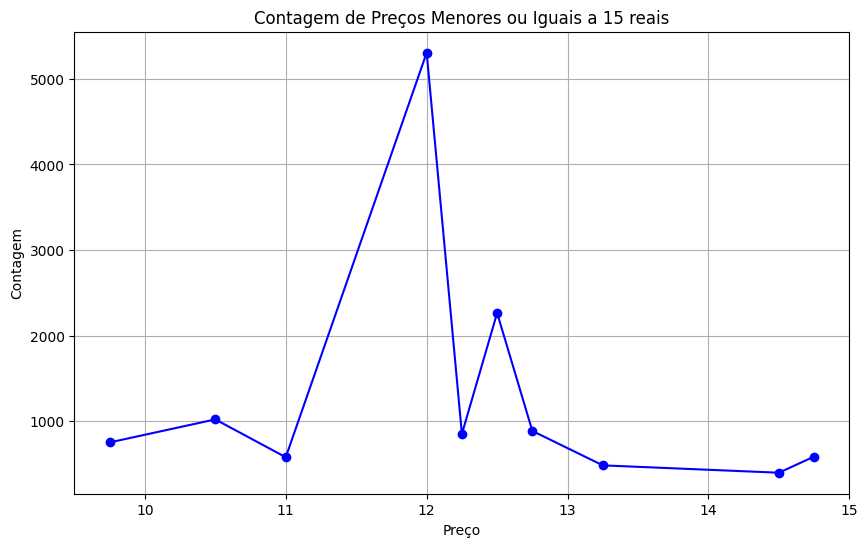

In [162]:
# Importando bibliotecas para gráfico de linhas
import matplotlib.pyplot as plt

# Filtrando preço menor ou igual a 15
df_filtrado = df.query('Preço <= 15')

# Contagem número de ocorrências de 'Preço'
contagem_precos = df_filtrado['Preço'].value_counts().sort_index()

# Plotando gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(contagem_precos.index, contagem_precos.values, marker='o', linestyle='-', color='b')
plt.title('Contagem de Preços Menores ou Iguais a 15 reais')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

In [163]:
# Exibindo o resultado
print(f'Total de preços entre R$16 a R$20: {df.query('Preço >= 16 and Preço <= 20').value_counts().shape[0]}')

Total de preços entre R$16 a R$20: 13313


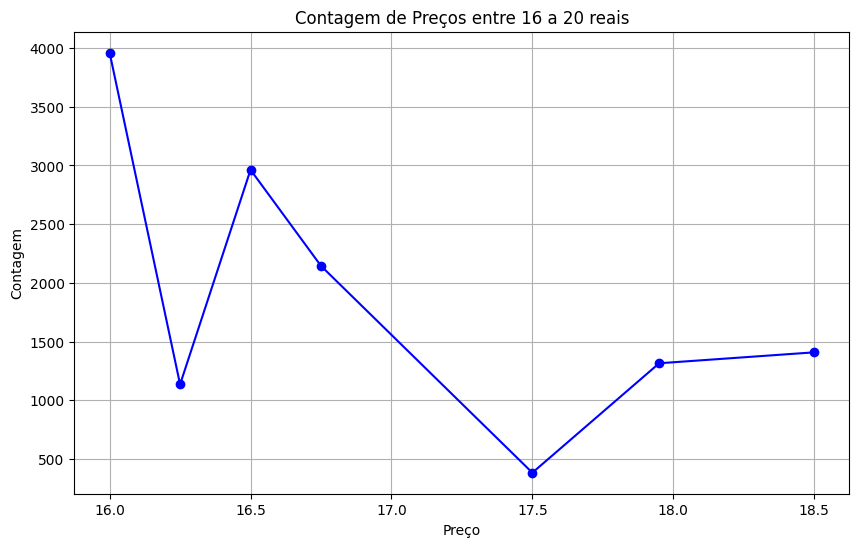

In [164]:
# Filtrando preço menor ou igual a 16 a 20
df_filtrado1 = df.query('Preço >= 16 and Preço <= 20')

# Contagem número de ocorrências de 'Preço'
contagem_precos = df_filtrado1['Preço'].value_counts().sort_index()

# Plotagem gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(contagem_precos.index, contagem_precos.values, marker='o', linestyle='-', color='b')
plt.title('Contagem de Preços entre 16 a 20 reais')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

In [165]:
# Exibindo o resultado
print(f'Total de preços acima de R$21: {df.query('Preço >= 21').value_counts().shape[0]}')

Total de preços acima de R$21: 1260


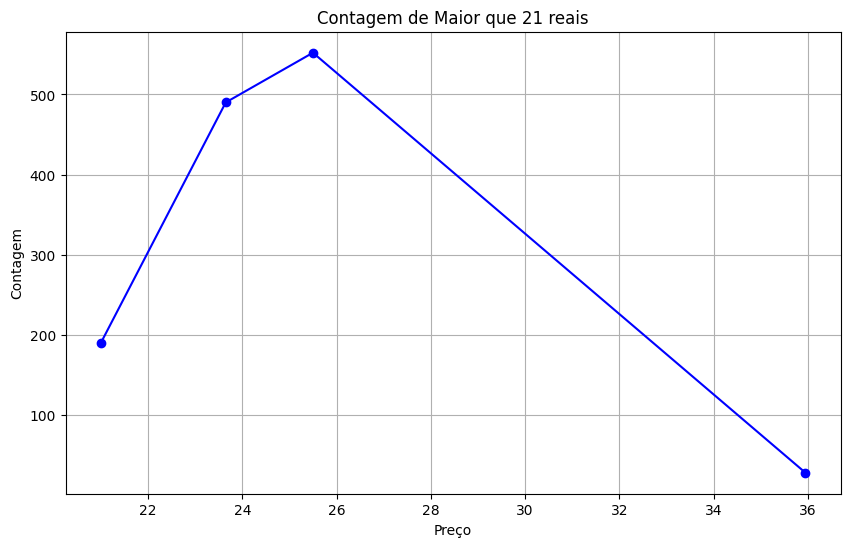

In [166]:
# Filtrando preço maior ou igual a 21
df_filtrado2 = df.query('Preço >= 21')

# Contagem número de ocorrências de 'Preço'
contagem_precos = df_filtrado2['Preço'].value_counts().sort_index()

# Plotagem gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(contagem_precos.index, contagem_precos.values, marker='o', linestyle='-', color='b')
plt.title('Contagem de Maior que 21 reais')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

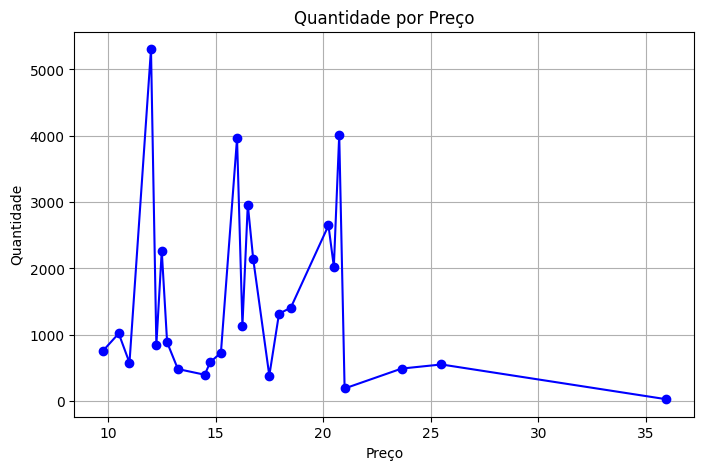

In [167]:
# Importando biblioteca para criar gráfico de linhas
import matplotlib.pyplot as plt

# Contagem dos preços únicos
contagem_precos = df['Preço'].value_counts().sort_index()

# Criando um gráfico de linhas com os preços e suas contagens
plt.figure(figsize=(8, 5))

# Plotando o gráfico de linhas
plt.plot(contagem_precos.index, contagem_precos.values, marker='o', linestyle='-', color='b')

# Títulos e rótulos
plt.title('Quantidade por Preço')
plt.xlabel('Preço')
plt.ylabel('Quantidade')

# Exibindo a grade
plt.grid(True)

# Exibindo o gráfico
plt.show()

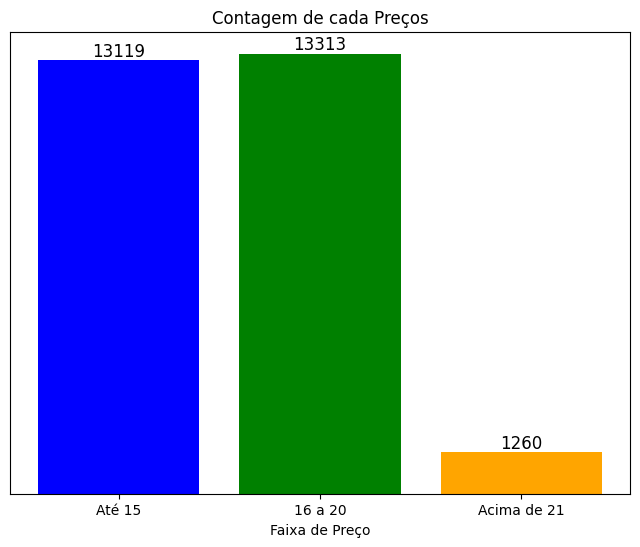

In [190]:
# Importando biblioteca para gráfico
import matplotlib.pyplot as plt

# Filtrando para cada 'Preço'
menor_15 = df.query('Preço <= 15').value_counts().shape[0] 
entre_16_20 = df.query('Preço >= 16 and Preço <= 20').value_counts().shape[0] 
acima_21 = df.query('Preço >= 21').value_counts().shape[0] 

# Montando o gráfico
valores = [menor_15, entre_16_20, acima_21]
labels = ['Até 15','16 a 20', 'Acima de 21']

# Plotagem gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, valores, color=['blue', 'green', 'orange'])

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()  # Obtém a altura da barra (valor)
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=12)

# Títulos e rótulos
plt.title('Contagem de cada Preços')
plt.xlabel('Faixa de Preço')
plt.yticks([])

# Exibindo o gráfico
plt.show()
